# Diferencias divididas

Consideremos, nuevamente, el problema de encontrar un polinomio que interpole a la función $f(x)$ en los puntos $x_0, x_1, \ldots x_n$. Las diferencias divididas de Newton son un método alternativo para determinar el polinomio de interpolación, y tienen una ventaja sobre el método de Lagrange: si se agrega un punto a las observaciones, no es necesario recalcular todos los coeficientes; solo se calcula el último.   

Este método expresa el polinomio de interpolación como una combinación lineal de una base alternativa, que consiste en los siguientes polinomios:
$$1,\:\: x-x_0, \:\: (x-x_0)(x-x_1), \:\: (x-x_0)(x-x_1)(x-x_2)\ldots \:\: (x-x_0)(x-x_1)\ldots (x-x_{n-1})$$  
No es muy complicado ver que el conjunto de polinomios dado es una base para los polinimios de grado menor o igual $n$. 

De modo que podemos expresar el polinomio de interpolación como: $$P(x) = a_0 + a_1(x - x_0) + a_2(x - x_0)(x - x_1) + \ldots  + a_n(x - x_0)(x - x_2) \ldots (x - x_{n-1}).$$

Entonces los coeficientes $a_0, a_1, a_2, \ldots, a_n$ se pueden calcular recursivamente usando las condiciones de interpolación $p(x_i) = f(x_i)$ para $i = 0, \ldots n$, como sigue:
$$
\begin{align}
P(x_0) = f(x_0) \qquad & \Longrightarrow \qquad a_0 = f(x_0)\\
P(x_1) = f(x_1) \qquad & \Longrightarrow \qquad a_1 = \frac{f(x_1) - f(x_0)}{x_1 - x_0}
\end{align}
$$

**Definición.** Los coeficientes del polinomio de interpolación en la forma de Newton son diferencias divididas, que se pueden definir de forma recursiva de la siguiente manera:

**Diferencias divididas de orden cero** 
$$f[x_0] = f(x_0)$$

**Primera diferencia dividida** de $f$ respecto a $x_i$ y $x_{i+1}$ 
$$f[x_i,x_{i+1}] = \frac{f[x_{i+1}] - f[x_i]}{x_{i+1}- x_{i}}$$

**Seguna diferencia dividida** de $f$ respecto a $x_i$, $x_{i+1}$ y $x_{i+2}$ 
$$f[x_i,x_{i+1},x_{i+2}] = \frac{f[x_{i+1},x_{i+2}] - f[x_i,x_{i+1}]}{x_{i+2}- x_{i}}$$

**En general, la $k$-esima diferencia dividida** de f respecto a $x_i, x_{i+1}, x_{i+2}, \ldots ,x_{i+k}$
$$f[x_i,x_{i+1}, \ldots x_{i+k-1}, x_{i+k}] = \frac{f[x_{i+1}, \ldots ,x_{i+k}] - f[x_i,\ldots ,x_{i+k-1}]}{x_{i+k}- x_{i}}$$


**Teorema.** Sea $P(x)$ el polinomio de interpolación a la función $f(x)$ en los puntos $x_0, x_1, \ldots x_n$. Entonces 

$P(x) = f[x_0] + f[x_0, x_1](x - x_0) + f[x_0, x_1, x_2](x - x_0)(x - x_1) + \ldots + f[x_0, x_1, \ldots, x_n](x - x_0)(x - x_1) \cdots (x - x_{n-1}).$

**Ejemeplo.** Use el método de diferencias divididas para construir el polinomio interpolante de grado cuatro con los puntos de la tabla

| x | f(x) |
|------|---------------------|
|0.0|-6.00000|
|0.1|-5.89483|
|0.3|-5.65014|
|0.6|-5.17788|
|1.0|-4.28172|


[[ 0.7651977   0.          0.          0.          0.        ]
 [ 0.620086   -0.48370567  0.          0.          0.        ]
 [ 0.4554022  -0.548946   -0.10873389  0.          0.        ]
 [ 0.2818186  -0.578612   -0.04944333  0.0658784   0.        ]
 [ 0.1103623  -0.571521    0.01181833  0.06806852  0.0018251 ]]
[1, t - 1.0, (t - 1.3)*(t - 1.0), (t - 1.6)*(t - 1.3)*(t - 1.0), (t - 1.9)*(t - 1.6)*(t - 1.3)*(t - 1.0)]
-0.483705666666666*t + 0.00182510288066044*(t - 1.9)*(t - 1.6)*(t - 1.3)*(t - 1.0) + 0.0658783950617283*(t - 1.6)*(t - 1.3)*(t - 1.0) - 0.108733888888889*(t - 1.3)*(t - 1.0) + 1.24890336666667


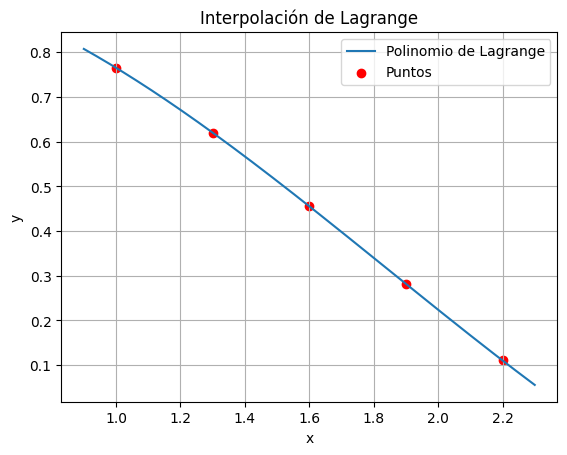

In [25]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

t = sp.symbols('t')

x_dato = np.array([1.0,1.3,1.6,1.9,2.2], dtype = float)
y_dato = np.array([0.7651977,0.6200860,0.4554022,0.2818186,0.1103623], dtype = float)

def diferenciasDiv(x,y):
    t = sp.symbols('t')
    n = len(x)
    F = np.zeros((n,n))
    prod = [1]*n

    for i in range(n):
        F[i][0] = y[i]
    
    for i in range(1,n):
        for j in range(1,i+1):
            F[i][j] = (F[i][j-1] - F[i-1][j-1])/(x[i] - x[i-j])
            prod[i] = prod[i]*(t - x[j-1])
    print(F)
    print(prod)
    p =sum(F[i][i]*prod[i] for i in range(n))
    print(p)
    return p

f = diferenciasDiv(x_dato,y_dato)

x_new = np.linspace(np.amin(x_dato)-0.1, np.amax(x_dato)+0.1, 400)
y_new= [f.subs(t, val) for val in x_new]

plt.plot(x_new, y_new, label='Polinomio de Lagrange')
plt.scatter(x_dato, y_dato, color='red', label='Puntos')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolación de Lagrange')
plt.grid(True)
plt.show()



